## EMA (12-day and 26-day)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('AAPL', 'yahoo', start='2019-10-10', end='2020-10-10')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-09,56.947498,56.410000,56.757500,56.757500,74770400.0,55.688404
2019-10-10,57.610001,56.825001,56.982498,57.522499,113013600.0,56.438999
2019-10-11,59.410000,58.077499,58.237499,59.052502,166795600.0,57.940178
2019-10-14,59.532501,58.667500,58.724998,58.967499,96427600.0,57.856781
2019-10-15,59.412498,58.720001,59.097500,58.830002,87360000.0,57.721867
...,...,...,...,...,...,...
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,115.439713
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.130112
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.032639


In [4]:
#Moving Averages
EMA12 =df.Close.ewm(span=12, adjust=False).mean()
EMA26 = df.Close.ewm(span=26, adjust=False).mean()

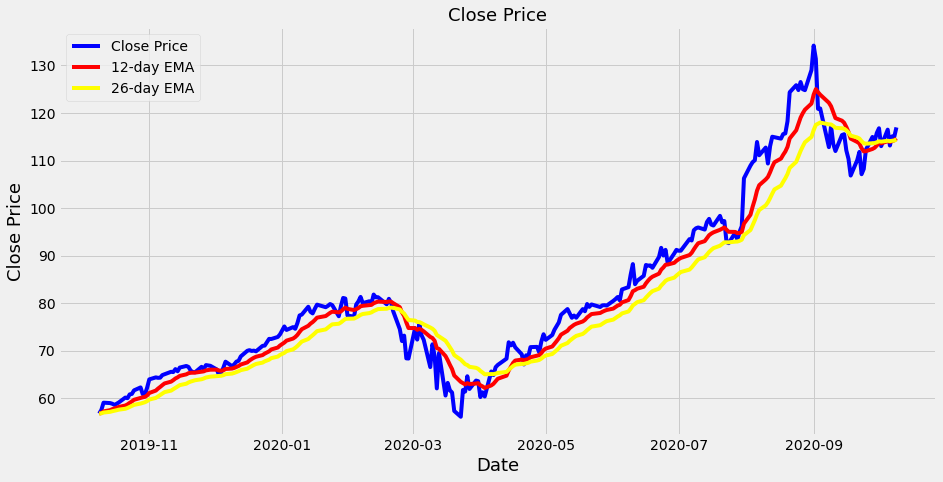

In [12]:
plt.figure(figsize=(14,7))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(EMA12, label="12-day EMA", color='red')
plt.plot(EMA26, label='26-day EMA', color='yellow')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

## MACD

In [6]:
df['EMA12']=EMA12
df['EMA26']=EMA26
df

,High,Low,Open,Close,Volume,Adj Close,EMA12,EMA26
Date,,,,,,,,
2019-10-09,56.947498,56.410000,56.757500,56.757500,74770400.0,55.688404,56.757500,56.757500
2019-10-10,57.610001,56.825001,56.982498,57.522499,113013600.0,56.438999,56.875192,56.814166
2019-10-11,59.410000,58.077499,58.237499,59.052502,166795600.0,57.940178,57.210163,56.979969
2019-10-14,59.532501,58.667500,58.724998,58.967499,96427600.0,57.856781,57.480522,57.127193
2019-10-15,59.412498,58.720001,59.097500,58.830002,87360000.0,57.721867,57.688134,57.253327
...,...,...,...,...,...,...,...,...
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,115.439713,114.061034,114.163140
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.130112,113.922414,114.088834
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.032639,114.100504,114.162254


In [7]:
df['MACD']=df['EMA12']-df['EMA26']
df['MACD']

Date
2019-10-09    0.000000
2019-10-10    0.061026
2019-10-11    0.230194
2019-10-14    0.353329
2019-10-15    0.434807
                ...   
2020-10-05   -0.102107
2020-10-06   -0.166420
2020-10-07   -0.061750
2020-10-08    0.012186
2020-10-09    0.229518
Name: MACD, Length: 254, dtype: float64

In [9]:
signal=df['MACD'].ewm(span=9, adjust=False).mean()

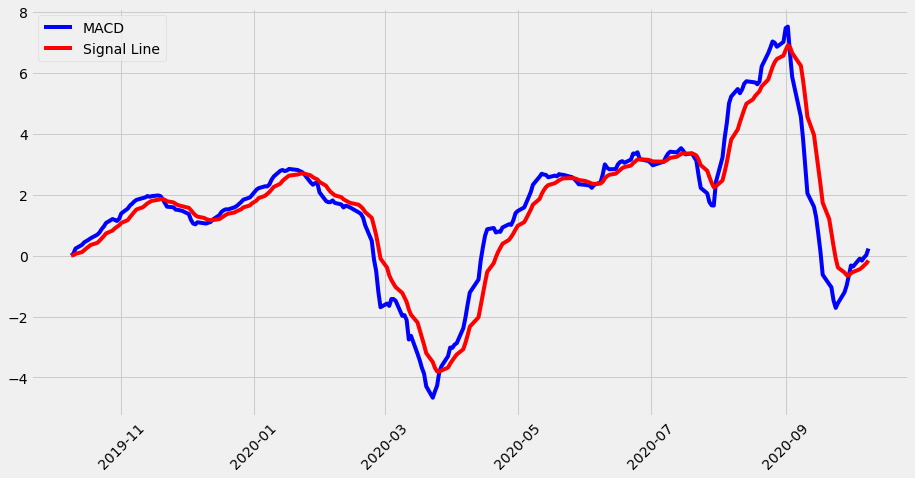

In [11]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, signal, label='Signal Line', color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [13]:
df['signal']=signal
df

,High,Low,Open,Close,Volume,Adj Close,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2019-10-09,56.947498,56.410000,56.757500,56.757500,74770400.0,55.688404,56.757500,56.757500,0.000000,0.000000
2019-10-10,57.610001,56.825001,56.982498,57.522499,113013600.0,56.438999,56.875192,56.814166,0.061026,0.012205
2019-10-11,59.410000,58.077499,58.237499,59.052502,166795600.0,57.940178,57.210163,56.979969,0.230194,0.055803
2019-10-14,59.532501,58.667500,58.724998,58.967499,96427600.0,57.856781,57.480522,57.127193,0.353329,0.115308
2019-10-15,59.412498,58.720001,59.097500,58.830002,87360000.0,57.721867,57.688134,57.253327,0.434807,0.179208
...,...,...,...,...,...,...,...,...,...,...
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,115.439713,114.061034,114.163140,-0.102107,-0.450418
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.130112,113.922414,114.088834,-0.166420,-0.393619
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.032639,114.100504,114.162254,-0.061750,-0.327245


In [16]:
def choice(signal):
    Buy=[]
    Sell=[]
    flag=-1
    for i in range (0, len(signal)):
        if df['MACD'][i]>df['signal'][i]:
            Sell.append(np.nan)
            if(flag!= 1):
                Buy.append(df['Close'][i])
                flag=1
            else:
                Buy.append(np.nan)
        elif df['MACD'][i]<df['signal'][i]:
            Buy.append(np.nan)
            if(flag!= 0):
                Sell.append(df['Close'][i])
                flag=0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return(Buy, Sell)
        

In [17]:
a=choice(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]

In [18]:
df

,High,Low,Open,Close,Volume,Adj Close,EMA12,EMA26,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,
2019-10-09,56.947498,56.410000,56.757500,56.757500,74770400.0,55.688404,56.757500,56.757500,0.000000,0.000000,NaN,NaN
2019-10-10,57.610001,56.825001,56.982498,57.522499,113013600.0,56.438999,56.875192,56.814166,0.061026,0.012205,57.522499,NaN
2019-10-11,59.410000,58.077499,58.237499,59.052502,166795600.0,57.940178,57.210163,56.979969,0.230194,0.055803,NaN,NaN
2019-10-14,59.532501,58.667500,58.724998,58.967499,96427600.0,57.856781,57.480522,57.127193,0.353329,0.115308,NaN,NaN
2019-10-15,59.412498,58.720001,59.097500,58.830002,87360000.0,57.721867,57.688134,57.253327,0.434807,0.179208,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,115.439713,114.061034,114.163140,-0.102107,-0.450418,NaN,NaN
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.130112,113.922414,114.088834,-0.166420,-0.393619,NaN,NaN
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.032639,114.100504,114.162254,-0.061750,-0.327245,NaN,NaN


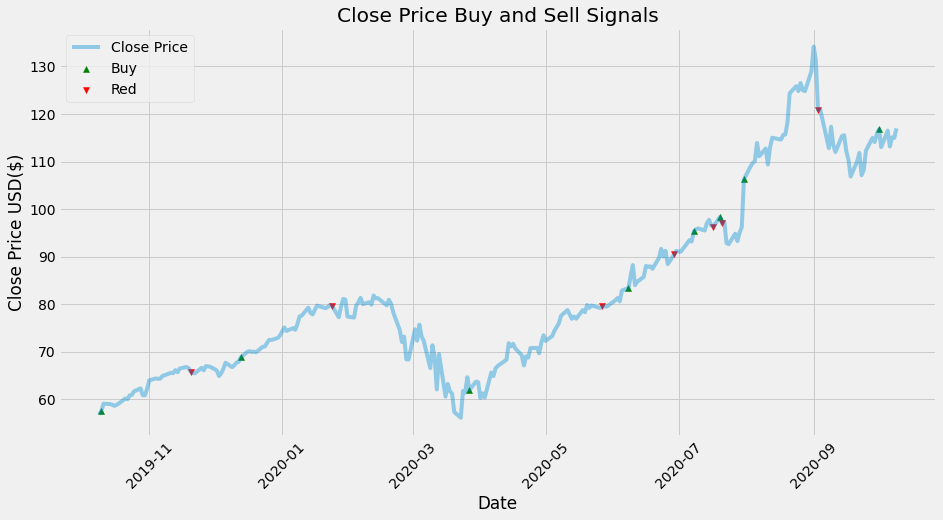

In [21]:
plt.figure(figsize=(14,7))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Red', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.4)
plt.title("Close Price Buy and Sell Signals")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()